In [1]:
%%time
import pandas as pd
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from copy import deepcopy,copy
from ipywidgets import IntProgress
from itertools import chain
from IPython.display import display
from datetime import datetime
import pickle
import os
# Since the 'user' column do not have relevant information will not be read

# Import Machine Scientist
from importlib.machinery import SourceFileLoader
path = '/export/home/shared/Projects/City_flows/rguimera-machine-scientist/machinescientist.py'
ms = SourceFileLoader('ms', path).load_module()

# Read data
states=['New York','Massachusetts','California','Florida','Washington','Texas']

CPU times: user 1.05 s, sys: 1.25 s, total: 2.3 s
Wall time: 1.83 s


In [2]:
name=open('./data/checkpoints/fold1_sample_dataframes_2022_11_02-02_54_03.pkl', "rb")
sample_train=pickle.load(name)
name.close()
#
name=open('./data/checkpoints/fold2_dataframes_2022_11_02-02_54_03.pkl', "rb")
test=pickle.load(name)
name.close()
#
name=open('./data/checkpoints/list_states_dataframes_2022_11_02-02_53_58.pkl', "rb")
list_states_dataframes=pickle.load(name)
name.close()


#
train_list_dataframes=sample_train
#
test_list_dataframes=test
#
x_train_list_sample=deepcopy(sample_train)
#
y_train_list_sample=deepcopy({key:item['total_pop_flow'] for key,item in sample_train.items()})

5952 5952
1180 1180
11727 11727
7092 7092
2083 2083
2782 2782


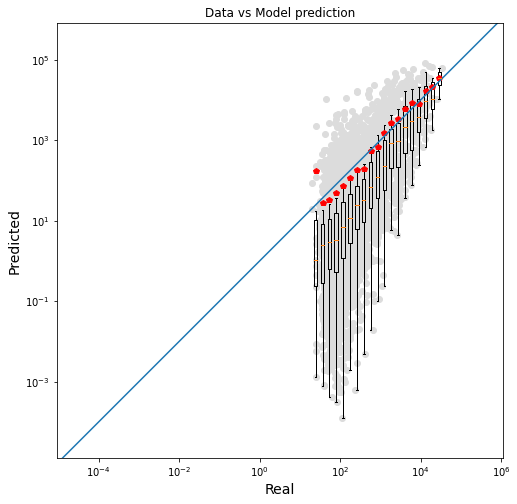

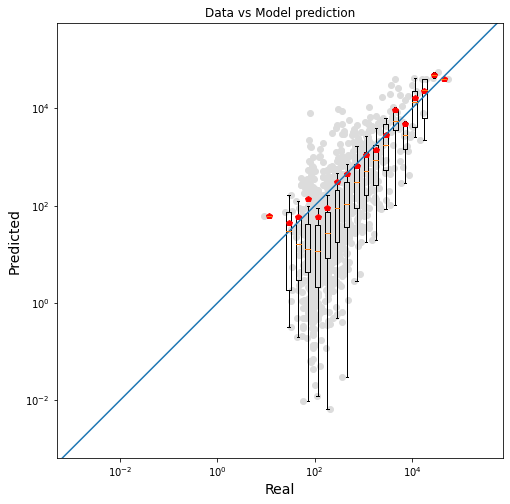

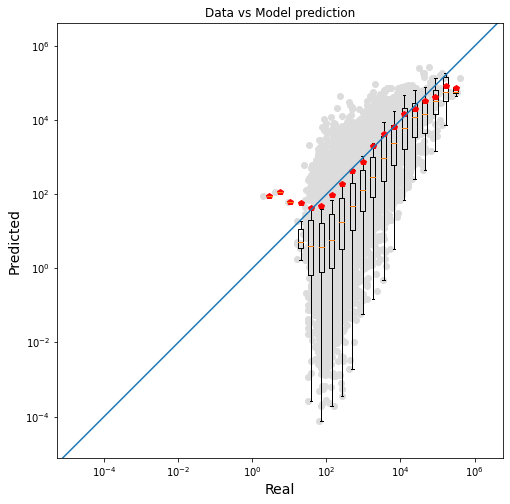

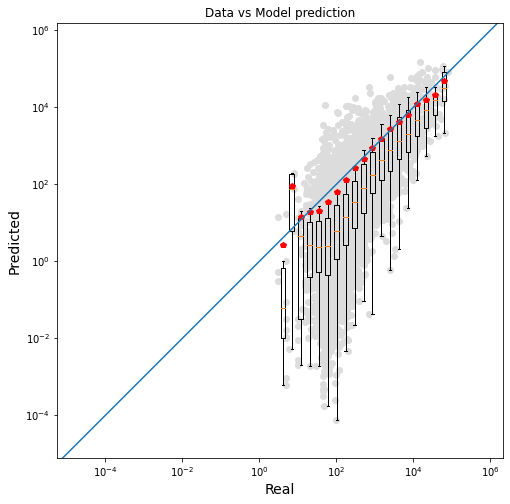

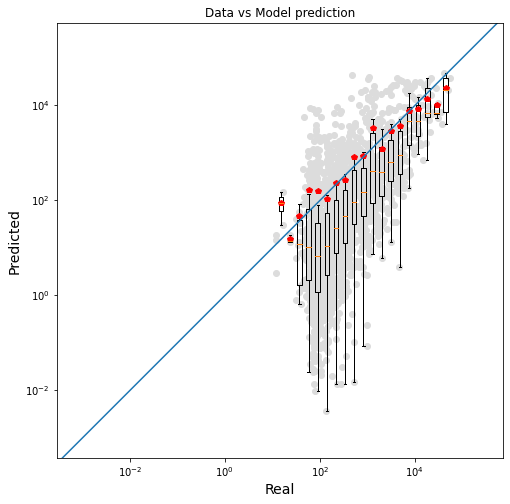

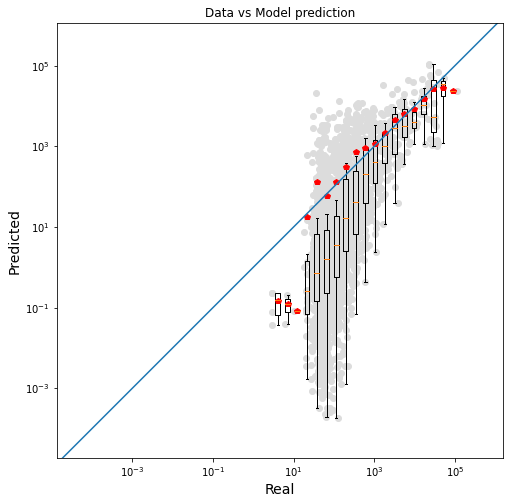

In [3]:
log_flows=False
res={}
def radiation_model(dataset,row):
    row=row[1]
    origin=row.name_o
    T_i=np.sum(dataset[dataset.name_o==origin].total_pop_flow.values)
    R=T_i*(row.m_o*row.m_d)/((row.m_o+row.s)*(row.m_o+row.m_d+row.s))
    #R=T_i*((1/(1.+(row.s/row.m_o)))-(1/(1.+((row.s+row.m_d)/row.m_o))))
    if log_flows==True:
        return np.log(R)
    else:
        return R
for i,(key,df) in enumerate(test_list_dataframes.items()):
    test_labels=[]
    predictions=[]
    for row in df.iterrows():
        test_labels.append(row[1].total_pop_flow)
        predictions.append(radiation_model(list_states_dataframes[i],row))
    if log_flows==True:
        predictions=np.exp(predictions)
    print(len(test_labels),len(predictions))
    res[key]=predictions
    ms.plot_predicted_model(prediction=predictions,real=test_labels,title="Data vs Model prediction",n_box=20,log_scale=True)

In [ ]:
res1={}
def radiation_model(dataset,row,M):
    row=row[1]
    origin=row.name_o
    T_i=np.sum(dataset[dataset.name_o==origin].total_pop_flow.values)
    R=T_i*(row.m_o*row.m_d)/((row.m_o+row.s)*(row.m_o+row.m_d+row.s))/(1.-row.m_o/M)
    #R=T_i*((1/(1.+(row.s/row.m_o)))-(1/(1.+((row.s+row.m_d)/row.m_o))))
    if log_flows==True:
        return np.log(R)
    else:
        return R
for i,(key,df) in enumerate(test_list_dataframes.items()):
    test_labels=[]
    predictions=[]
    m1=list_states_dataframes[i][['name_o','m_o']].drop_duplicates(subset = "name_o")
    m2=list_states_dataframes[i][['name_d','m_d']].drop_duplicates(subset = "name_d")
    MM=pd.concat([m1.rename(columns={'name_o': 'name','m_o': 'm'}),m2.rename(columns={'name_d': 'name','m_d': 'm'})],ignore_index=True)
    MM=MM.drop_duplicates(subset = "name")
    M=float(MM['m'].sum())
    print(M)
    for row in df.iterrows():
        test_labels.append(row[1].total_pop_flow)
        predictions.append(radiation_model(list_states_dataframes[i],row,M))
    if log_flows==True:
        predictions=np.exp(predictions)
    print(len(test_labels),len(predictions))
    res1[key]=predictions
    ms.plot_predicted_model(prediction=predictions,real=test_labels,title="Data vs Model prediction",n_box=20,log_scale=True)


15364969.0
5952 5952
4687088.0
1180 1180
35272825.0


In [ ]:
res2={}
def radiation_model(dataset,row,M):
    row=row[1]
    origin=row.name_o
    destination=row.name_d
    T_i=np.sum(dataset[dataset.name_o==origin].total_pop_flow.values)
    m_o=np.sum(dataset[dataset.name_d==origin].total_pop_flow.values)
    m_d=np.sum(dataset[dataset.name_d==destination].total_pop_flow.values)
    M= np.sum(dataset.total_pop_flow.values)
    R=T_i*(m_o*m_d)/((m_o+row.sk)*(m_o+m_d+row.sk))/(1.-m_o/M)
    #R=T_i*((1/(1.+(row.s/row.m_o)))-(1/(1.+((row.s+row.m_d)/row.m_o))))
    if log_flows==True:
        return np.log(R)
    else:
        return R
for i,(key,df) in enumerate(test_list_dataframes.items()):
    test_labels=[]
    predictions=[]
    m1=list_states_dataframes[i][['name_o','m_o']].drop_duplicates(subset = "name_o")
    m2=list_states_dataframes[i][['name_d','m_d']].drop_duplicates(subset = "name_d")
    MM=pd.concat([m1.rename(columns={'name_o': 'name','m_o': 'm'}),m2.rename(columns={'name_d': 'name','m_d': 'm'})],ignore_index=True)
    MM=MM.drop_duplicates(subset = "name")
    M=float(MM['m'].sum())
    print(M)
    for row in df.iterrows():
        test_labels.append(row[1].total_pop_flow)
        predictions.append(radiation_model(list_states_dataframes[i],row,M))
    if log_flows==True:
        predictions=np.exp(predictions)
    print(len(test_labels),len(predictions))
    res2[key]=predictions
    ms.plot_predicted_model(prediction=predictions,real=test_labels,title="Data vs Model prediction",n_box=20,log_scale=True)

In [ ]:
for i in states:
    ms.plot_predicted_model(prediction=res[i],real=res1[i],title="Data vs Model prediction",n_box=20,log_scale=True)

In [ ]:
for i in states:
    ms.plot_predicted_model(prediction=res[i],real=res2[i],title="Data vs Model prediction",n_box=20,log_scale=True)

In [ ]:
import matplotlib.gridspec as gs

In [ ]:
letter='ABCDEFGHIJKLM'
fig = plt.figure(figsize=(20,7))
g = gs.GridSpec(2,6)
offset=0
SMALL_SIZE = 17
MEDIUM_SIZE = 17
BIGGER_SIZE = 17
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams.update({'font.size': 17})

for i in states:
    ax = fig.add_subplot(g[offset])
    data=res[i]
    data1=res1[i]
    min_xy=min(data+data1)
    max_xy=max(data+data1)
    min_xy=min_xy/10.
    max_xy=max_xy*10.
    ax.plot((min_xy, max_xy), (min_xy,max_xy))
    ax.scatter(data,data1,c='gainsboro')
    #Config
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(i)
    ax.text(0.2, 0.8, letter[offset],fontweight='bold',transform=ax.transAxes)
    #
    if offset==0:ax.set_ylabel('Masucci 2013')
    #ax.axis('equal')
    #ax.tick_params(axis = 'both')
    ax.set(adjustable='box', aspect='equal')
    ax.set_xlim(min_xy,max_xy)
    ax.set_ylim(min_xy,max_xy)
    offset+=1
for i in states:
    ax = fig.add_subplot(g[offset])
    data=res[i]
    data1=res2[i]
    min_xy=min(data+data1)
    max_xy=max(data+data1)
    if i=='Washington':
        print(min_xy,max_xy)
    min_xy=min_xy/10.
    max_xy=max_xy*10.
    if i=='Washington':
        print(min_xy,max_xy)
        min_xy=1e-3
    ax.plot(data,data1,'.',c='gainsboro',rasterized=True)
    #ax.scatter(data,data1,c='gainsboro')
    ax.plot((min_xy, max_xy), (min_xy,max_xy),lw=2.5)
    
    #Config
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(i)
    #
    ax.text(0.2, 0.8, letter[offset],fontweight='bold',transform=ax.transAxes)
    if offset==6:ax.set_ylabel('Lenormand 2012')
    #ax.axis('equal')
    #ax.tick_params(axis = 'both')
    #ax.set(adjustable='box', aspect='equal')
    ax.set(aspect='equal')
    ax.set_xlim(min_xy,max_xy)
    ax.set_ylim(min_xy,max_xy)
    offset+=1
fig.tight_layout()


fig.supxlabel('Simini 2012')
fig.show()
#fig.savefig('./Plots/Radiation_SI_rasterized.pdf',dpi=300)

In [ ]:
color_dict=p.color_dict
chars='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26

import matplotlib.cm as cm
import matplotlib.gridspec as gs
mpl.rc('font', family='arial')
sbrn.set(style='ticks', font_scale=2)
colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
colors=colors[::-1]
#SMALL_SIZE = 26
#MEDIUM_SIZE = 26
#BIGGER_SIZE = 26
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('font', family='Arial')
plt.rcParams['font.family'] = 'Arial'
#sbrn.set(style='ticks', font_scale=2)
#fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)
#plt.gca().set_aspect('equal')
fist_state=list(_dict.keys())[0]
if models==None:
    models=[ k for k in _dict[fist_state].keys() if k!='test']
fig, axs = plt.subplots(len(models),len(_dict),figsize=(25,17.5))#,sharey='col',sharex='col')
plt.rc('font', family='Arial')
sbrn.set(style='ticks', font_scale=2)
fig.supxlabel('Real',va='baseline')
g = gs.GridSpec(4,6)
g.update(wspace=2.0, hspace=0.3)
c_count=0
for i,m in enumerate(models[::-1]):

    if m=='test': continue
    #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)#,sharex=True)
    alpha=1.
    #colors = cm.rainbow(np.linspace(0, 1, len(_dict[state])))
    for j,state in enumerate(_dict.keys()):
        t='test'
        if m=='Deep Gravity':
            t='testDG'
        axs[i,j].scatter(_dict[state][t], _dict[state][m],label=m, alpha=0.1,c=[colors[i]])#bar_label(deepcopy(p1), label_type=None)
        if j==0: axs[i,j].set_ylabel(m, fontweight="bold")
        if i==0:
            axs[i,j].set_title(state, fontweight="bold")
        axs[i,j].tick_params(direction='inout', width=2)

        axs[i,j].set_yscale('log')
        axs[i,j].set_xscale('log')
        ratio = 1.0
        alpha=alpha-0.1
    #fig.legend(loc=5)
        xleft, xright = axs[i,j].get_xlim()
        ybottom, ytop = axs[i,j].get_ylim()
        minimum = np.min((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
        maximum = np.max((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
    #ax.set_xlim(minimum*1.2,maximum*1.2)
    #ax.set_ylim(minimum*1.2,maximum*1.2)
    #axs.plot((xleft, xright), (ybottom,ytop))
        axs[i,j].plot(lims, lims)
        axs[i,j].tick_params(axis = 'both')
        #axs[i,j].xticks([])
        if list_ticks!=None:
            axs[i,j].set_xticks(list_ticks)
            axs[i,j].set_yticks(list_ticks)
        if j>0: axs[i,j].set_yticklabels([])
        if i<len(models)-1: axs[i,j].set_xticklabels([])
        axs[i,j].set_xlim(lims)
        axs[i,j].set_ylim(lims)
        axs[i,j].text(.1, .9,chars[c_count], ha='left', va='top',size=30, transform=axs[i,j].transAxes, weight='bold')
        axs[i,j].set(adjustable='box', aspect='equal')
        c_count+=1
    #plt.tight_layout(h_pad=0.3,w_pad=0.3)

fig.tight_layout()
if name!=None:
    fig.savefig(name,format='pdf')
fig.show()